# Odvodi

Ekvivalentne definicije odvoda:

Desni odvod:
$$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h} $$

Levi odvod:
$$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h} $$

Centralni odvod:
$$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}$$

## Numberična implementacija

Forward differences
$$ f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n} $$

Backward differences
$$ f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}} $$

Central differences
$$ f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}} $$

Primer:

$$ f(x)=\sin(x)x-\frac{1}{100}x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

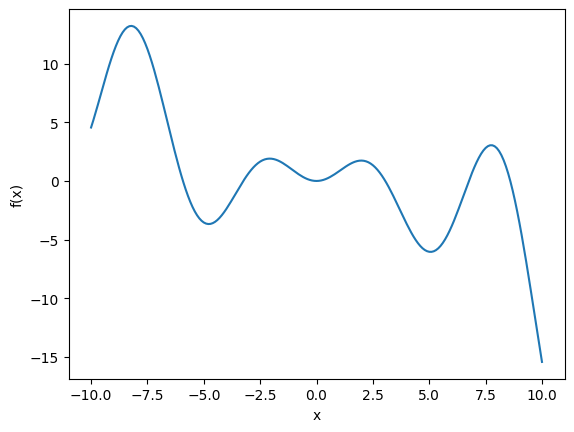

In [3]:
x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, y_list)

Analitični odvod:

$$ f'(x)=\cos(x)\cdot x + \sin(x)\cdot 1 -\frac{3}{100}x^2 $$

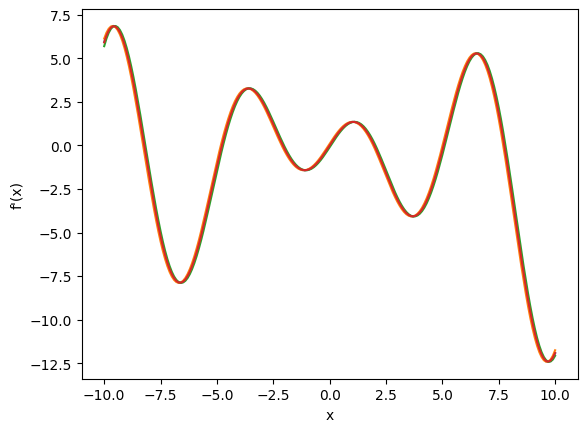

In [5]:
x_list = np.linspace(-10, 10, 201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list+h) - f(x_list) ) / h
backward_d_list = ( f(x_list) - f(x_list-h) ) / h
central_d_list = ( f(x_list+h) - f(x_list-h) ) / (2*h)

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytical_d_list)
plt.plot(x_list, forward_d_list)
plt.plot(x_list, backward_d_list)
plt.plot(x_list, central_d_list)

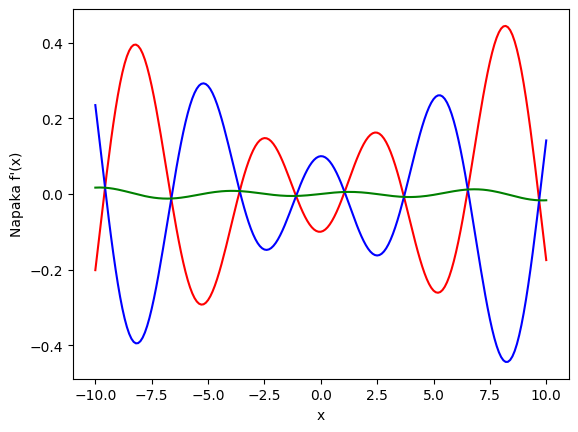

In [6]:
plt.xlabel('x')
plt.ylabel("Napaka f'(x)")

plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')

## Gradient, divergenca, rotor

Obravnavajmo funkcijo večih spremenljivk, na primer:

$$ f(x,y,z) $$

in funkcijo, ki ima matrično sliko:

$$ \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix} $$

Definiramo operator Nabla

$$ \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}$$

Definiramo naslednje operacije:

- gradient: $ \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}$

- rotor: $\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}$

- divergenca: $\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)$

### Primer

$$ f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4) $$

$$ \vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix} $$

In [7]:
def f(r):
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

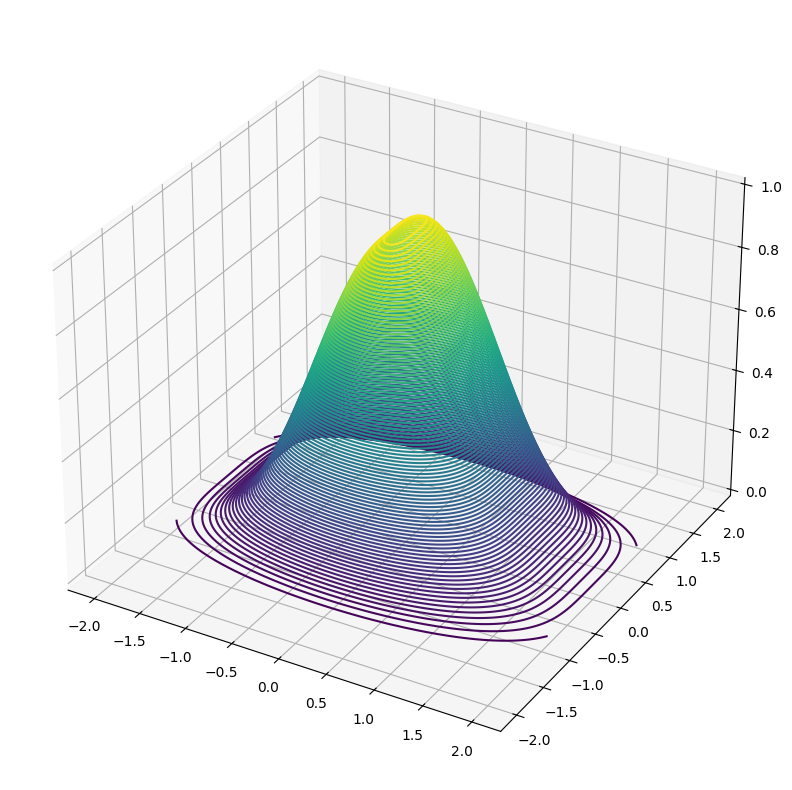

In [10]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

In [9]:
# Spremenimo globalne parametre objekta figure v tem notebooku
plt.rcParams['figure.figsize'] = [15, 10]

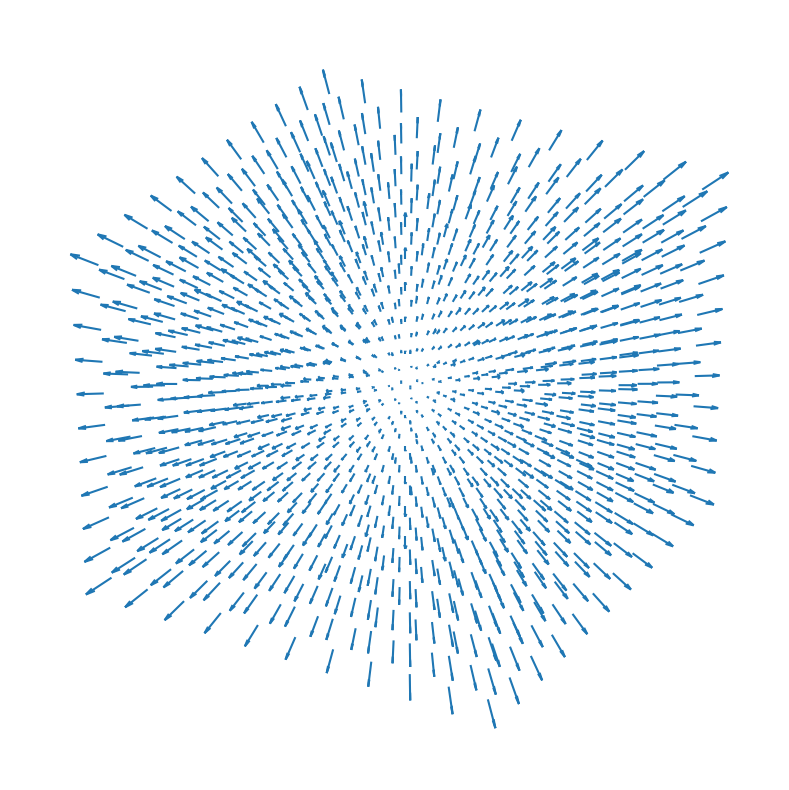

In [11]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

## Gradient

In [12]:
def gradient(f,r,h):
    x,y,z = r
    partialx = ( f(np.array([x+h,y,z])) - f(np.array([x-h,y,z]))) / (2*h)
    partialy = ( f(np.array([x,y+h,z])) - f(np.array([x,y-h,z]))) / (2*h)
    partialz = ( f(np.array([x,y,z+h])) - f(np.array([x,y,z-h]))) / (2*h)
    return np.array([ partialx, partialy, partialz ])

In [13]:
r = np.array([0.5,-1.2,-8])
h = 0.0001

gradient(f,r,h)

array([-0.09792044,  0.67682606,  0.        ])

Analitična rešitev

$$ \nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} $$

In [14]:
np.array([
    -2*r[0] * np.exp( -r[0]**2 -r[1]**4 ),
    -4*r[1]**3 * np.exp( -r[0]**2 -r[1]**4 ),
    0
])

array([-0.09792044,  0.67682606,  0.        ])

## Divergenca

In [15]:
def divergence(g,r,h):
    x,y,z = r
    dgxdx = ( g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0] ) / (2*h)
    dgydy = ( g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1] ) / (2*h)
    dgzdz = ( g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2] ) / (2*h)
    return dgxdx + dgydy + dgzdz

In [16]:
divergence(g,r,h)

0.24676318364020428

Analitična rešitev 

$$ \nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} $$

In [17]:
2 / np.linalg.norm(r)

0.24676318365598574

## Rotor

In [18]:
def curl(g,r,h):
    x,y,z = r
    dgxdy = ( g(np.array([x,y+h,z]))[0] - g(np.array([x,y-h,z]))[0] ) / (2*h)
    dgxdz = ( g(np.array([x,y,z+h]))[0] - g(np.array([x,y,z-h]))[0] ) / (2*h)
    dgydx = ( g(np.array([x+h,y,z]))[1] - g(np.array([x-h,y,z]))[1] ) / (2*h)
    dgydz = ( g(np.array([x,y,z+h]))[1] - g(np.array([x,y,z-h]))[1] ) / (2*h)
    dgzdx = ( g(np.array([x+h,y,z]))[2] - g(np.array([x-h,y,z]))[2] ) / (2*h)
    dgzdy = ( g(np.array([x,y+h,z]))[2] - g(np.array([x,y-h,z]))[2] ) / (2*h)
    return np.array([ dgzdy-dgydz, dgxdz-dgzdx, dgydx-dgxdy ])

In [19]:
curl(g,r,h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

Analitična rešitev:

$$ \nabla \times \vec{g}(\vec{r}) = 0 $$